In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Damping Coefficient Calculations

To ignore sway and yaw motions in order to limit the discussion  to the problem of nonlinear roll damping,
 we can write down the equation of the roll motion of a ship in the following
simple single-degree-of-freedom forms:

If$$A\ddot{\phi}\ + B (\dot{\phi})\dot{\phi} + C(\phi ,t) =M(\omega t) \tag{1}$$ 
in which $\phi$ is the angular roll motion, dots represent time derivatives, $A$ is the total
moment of inertia in roll, $M$ is the wave exciting moment, $\omega$ is the wave frequency
and $t$ is time. The damping coefficient $B$ and the restoring coefficient $C$ are shown
as nonlinear quantities. The restoring term in Eq. (1) is often given in a polynomial
form in f. The damping term B may be represented by:
$$ B(\dot{\phi}) = B_1{\dot{\phi}} + B_2 \lvert \dot{\phi} \rvert \dot{\phi} + B_3 \phi^3 \tag{2}$$
(Dalzell 1976). Linearization of the nonlinear term involves either regular wave harmonic
equivalent linearization or irregular wave stochastic linearization method. The harmonic
linearization equates the energy loss per cycle and results in the following relationship. 
$$ B_e = B_1 + \frac{8}{3\pi}\omega\phi_a B_2 + \frac{3}{4}\omega^2\phi_a^2 B_3 \tag{3}$$
where $\phi_a$ is the amplitude of roll.

Eq.3 will allow for the calculation of extinction coefficients $a_1,a_2, a_3$ which will be used when calculating eddy damping. The coeffcients will be assumed using roll decay test provided by maxsurf

## Roll Decay 

Roll Decay was run for the maxsurf model heeled at $30^{\circ}$ to get a roll decay graph.


##### Froude Energy Method

The energy done by the restoring moment lever arm during the half cycle between φ1 and φ2 is
described by Equation (4). By averaging the the successive amplitudes the restoring energy can be
represented using Equation(5), where $\phi_a =
\phi_1+\phi_2$ , $c = \omega_d^2$, $\frac{d\phi}{dr} = \phi_1 − \phi_2$

$$E_{r\frac{1}{2}}=\int_{\phi_2}^{\phi_1} c\phi \,d\phi = \frac{c}{2}[\phi_1^2 - \phi_2^2] \tag{4}$$

$$E_{r\frac{1}{2}} = \omega_d^2 \phi_a \frac{\phi}{dr} \tag{5}$$

which allows for the derivation of Equation(3) to get a plot using in which

$$ \frac{d\phi_a}{dr} = a \phi_a +b \phi_a^2 + c \phi_a^3\tag{6}$$

and a is decay exticntion coefficient $a1$ and b is decay coefficient $a2$ and $a3$ is c

In [129]:
rd=pd.read_excel('roll_decay30.xlsx')

In [130]:
rd

,time[s],roll[deg]
0,0.000,-30.000001
1,1.000,-30.000001
2,1.047,-30.000001
3,1.064,-30.000001
4,1.081,-30.000001
...,...,...
5680,97.585,0.001566
5681,97.601,0.001112
5682,97.618,0.000631
5683,97.635,0.000150


In [131]:
rd_time = rd.iloc[:, 0]

In [132]:
rd_time

0        0.000
1        1.000
2        1.047
3        1.064
4        1.081
         ...  
5680    97.585
5681    97.601
5682    97.618
5683    97.635
5684    97.651
Name: time[s], Length: 5685, dtype: float64

In [133]:
rd_roll = rd.iloc[:, 1]

Text(0, 0.5, 'Roll angle,φ')

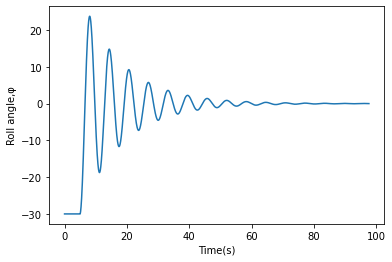

In [134]:
plt.plot(rd_time,rd_roll)
plt.xlabel('Time(s)')
plt.ylabel('Roll angle,φ')

In [135]:
peaks=[ 23.7534351,14.808004,9.231078,5.754706,3.587509,2.236410,1.394176,0.869140,0.541811,0.337763,0.210565,0.131264,0.081829,0.051013,]

In [136]:
peaks

[23.7534351,
 14.808004,
 9.231078,
 5.754706,
 3.587509,
 2.23641,
 1.394176,
 0.86914,
 0.541811,
 0.337763,
 0.210565,
 0.131264,
 0.081829,
 0.051013]

In [137]:
troughs= [ -18.754816,-11.691638,-7.288439,-4.543706,-2.832531,-1.765746,-1.100791,-0.686232,-0.427783,-0.266687,-0.166252,-0.103639,-0.064610,-0.040278 ]

In [138]:
troughs

[-18.754816,
 -11.691638,
 -7.288439,
 -4.543706,
 -2.832531,
 -1.765746,
 -1.100791,
 -0.686232,
 -0.427783,
 -0.266687,
 -0.166252,
 -0.103639,
 -0.06461,
 -0.040278]

In [139]:
diff = []

zip_object = zip(peaks, troughs)
for list1_i, list2_i in zip_object:
    diff.append(list1_i-list2_i)
print(diff)

[42.5082511, 26.499642, 16.519517, 10.298411999999999, 6.42004, 4.002155999999999, 2.494967, 1.555372, 0.9695940000000001, 0.6044499999999999, 0.376817, 0.23490299999999997, 0.14643899999999999, 0.09129100000000001]


Text(0, 0.5, 'φ1-φ2')

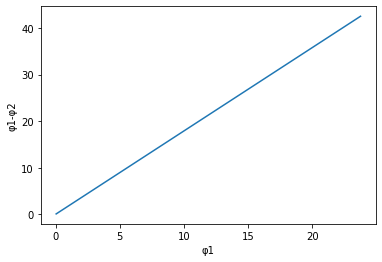

In [140]:
plt.plot(peaks,diff)
plt.xlabel('φ1')
plt.ylabel('φ1-φ2')


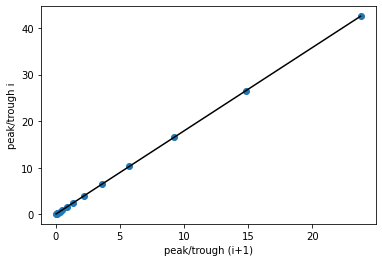

In [141]:
#Fit line
slope, intercept = np.polyfit(peaks, diff, 1)

#Plot
plt.figure()
plt.xlabel('peak/trough (i+1)')
plt.ylabel('peak/trough i')
plt.scatter(peaks, diff) 
plt.plot(np.unique(peaks), np.poly1d(np.polyfit(peaks, diff, 1))(np.unique(peaks)), color = 'k')
plt.show()

In [142]:
print(slope)

1.7895587625333447


In [143]:
np.log(slope)/(2*np.pi)

0.0926232570959174

In [144]:
damp =[(x + y)/2 for x, y in zip(peaks, troughs)]
amp = [x/2 for x in peaks]

In [145]:
damp

[2.4993095499999995,
 1.5581830000000005,
 0.9713194999999999,
 0.6054999999999997,
 0.37748899999999996,
 0.23533199999999987,
 0.1466925,
 0.09145400000000004,
 0.05701400000000001,
 0.035537999999999986,
 0.022156499999999996,
 0.013812499999999998,
 0.008609499999999999,
 0.005367500000000001]

In [146]:
amp

[11.87671755,
 7.404002,
 4.615539,
 2.877353,
 1.7937545,
 1.118205,
 0.697088,
 0.43457,
 0.2709055,
 0.1688815,
 0.1052825,
 0.065632,
 0.0409145,
 0.0255065]

Text(0, 0.5, 'dφ amplitude')

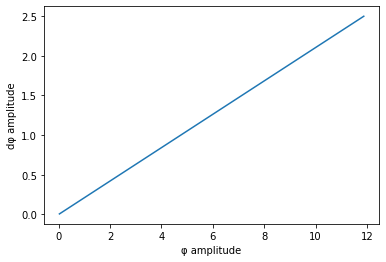

In [147]:
plt.plot(amp,damp)
plt.xlabel('φ amplitude')
plt.ylabel('dφ amplitude')

Text(0, 0.5, 'dφ amplitude')

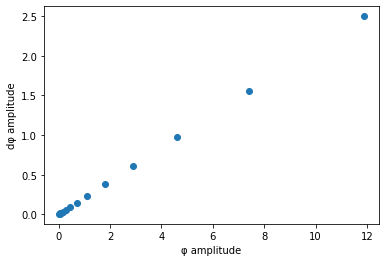

In [148]:
plt.scatter(amp,damp)
plt.xlabel('φ amplitude')
plt.ylabel('dφ amplitude')

Using Equation.(6) we can use simultaneous equations from values to get values for a and b

In [149]:
A = np.array([[amp[2],(amp[2]**2),amp[2]**3],[amp[3],(amp[3]**2),amp[3]**3],[amp[4],(amp[4]**2),amp[4]**3]]) 

In [150]:
B= np.array([damp[2],damp[3],damp[4]])

In [151]:
C = np.linalg.solve(A,B)
print(C)

[ 2.10488705e-01 -3.27193739e-05  5.06172897e-06]


In [152]:
A1 = np.array([[amp[2],(amp[2]**2)], [amp[3],(amp[3]**2)]])
B1= np.array([damp[2], damp[3]])
C1 = np.linalg.solve(A1,B1)
print(C1)

[2.10421483e-01 5.20761459e-06]


In [153]:
L=300
B=50
T= 11.265
#T=5.2
o= np.radians(25)
#v= 1.18831*(10**-6)
p=1025
g=9.81
KG = 15.348
#KG=5.2
GM =13.815
#GM=52.093
OG=abs(T-KG)
C_b=0.657
C_p=0.762
C_w = 0.871
C_m = C_b/C_p
lbk = 60
Tn=13
#W= 37531
e_f=40
U = 20*0.5144
vol= 110210.915
#vol = 35467.287
Am = C_m*B*T
b_bk= 0.88
w= 2*np.pi/Tn
v=0.0178/(L+0.336*15 +0.000221*15**2 )

## Empirical Damping Method

The empirical damping model suggested by Japanese researchers (Himeno 1981, Ikeda et al. 1978) which has become the standard for estimating the roll damping of a ship shaped structure.
quivalent linear damping $B_e$ is assumed to be divided into 5 components – wave
damping $B_W$ , skin friction damping $B_F$ , eddy damping $B_E$ , lift damping $B_L$ and bilge keel
damping $B_{BK}$ . It is assumed that the interaction between each of the components is negligible. 
$$ B_e = B_w + B_f + B_L + B_e + B_{BK} \tag{7}$$

## Friction Damping
-Provides equations used to calculate the Friction damping which is caused by the skin-friction stress on the hull in roll motion, so that it may possibly be influenced by the presence of waves
and bilge keels.
$$ B_{f0} = 0.787 \rho S r_s^2 \sqrt{\omega v} [1 + 0.00814(\frac{r_s^2 \phi_a^2}{v})^{0.386}] \tag{8} $$
$$ S = L(1.7T +C_b *B) \tag{9}$$
$$ r_s = \frac{1}{\pi} [(0.887 + 0.145C_b) \frac{S}{L} - 2*KG] \tag{10}$$
$$ B_f = B_{f0} (1 + 4.1 \frac{U}{\omega L}) \tag{11}$$

In [154]:
S = L*(1.7*T + C_b*B)
r_s = (1/np.pi)*((0.887+(0.145*C_b)*(S/L) - 2*OG))

In [155]:
B_f0 = 0.787*p*S*((r_s)**2)*((w*v)**0.5)*(1+(0.00814*((r_s**2 * o**2)/(v))**0.386))

In [156]:
B_f0

41970.722745927575

In [157]:
B_f = B_f0*(1+4.1*(U/(w*L)))

In [158]:
B_f

54180.38047039438

In [159]:
B_fn = B_f*(1/(p*vol*B**2))* (B/2*g)**0.5

In [160]:
B_fn

3.004402234974375e-06

In [161]:
U1=18*0.5144
U2=19*0.5144
U4=22*0.5144
U5=26*0.5144
U6=30*0.5144

In [162]:
def B_fn(U):
    x = B_f0*(1+4.1*(U/(w*L)))
    y = (x/(p*vol*B**2))*(B/2*g)**0.5
    return y

In [163]:
B_fny =[B_fn(U1),B_fn(U2),B_fn(U),B_fn(U4),B_fn(U5),B_fn(U6)]

In [164]:
Fn= U/(g*L)**0.5

In [165]:
Fn

0.18964256666709325

In [166]:
def Fn(U):
    x = U/(g*L)**0.5 
    return x

In [167]:
Fnx=[Fn(U1),Fn(U2),Fn(U),Fn(U4),Fn(U5),Fn(U6)]

Text(0.5, 0, 'Froude Number')

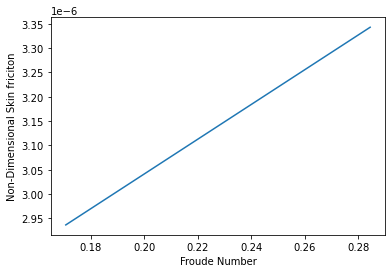

In [168]:
plt.plot(Fnx,B_fny)
plt.ylabel('Non-Dimensional Skin friciton')
plt.xlabel('Froude Number')

## Eddy Damping

#### Lewis form

In [169]:
h_o = B/(2*T) # beam-draft ratio

In [170]:
#h_o= 4.547

In [171]:
a_c = Am/(B*T) #area coefficient

In [172]:
C1=(3 + ((4*a_c)/np.pi)) + (1-((4*a_c)/np.pi))*((h_o - 1)/(h_o + 1))

In [173]:
a3= (-C1+ 3 + (9 - 2*C1)**0.5)/C1

In [174]:
a1 = ((1 + a3)*(h_o-1))/(h_o+1)

### Eddy Calculations

In [175]:
f1 = 0.5*(1 + np.tanh(20*(a_c-0.7)))

In [176]:
f2 = 0.5*(1-np.cos(np.pi*a_c)) - 1.5*(1 - np.exp(-5*(1-a_c)))*(np.sin(np.pi*a_c))**2

In [177]:
f3 = 1 + 4*(np.exp(-1.65e5*(1-a_c)**2))

In [178]:
M1 = B/((2)*(1+a1+a3))

In [179]:
phi = 0
phi2 = 0.5*(np.cos((a1*(1+a3))/(4*a3)))**-1

In [180]:
r_m1 = M1 *(((1+a1)*np.sin(phi) - a3* np.sin(3*phi))**2 + ((1-a1)*np.cos(phi) + a3* np.cos(3*phi))**2)**0.5
r_m2 = M1 *(((1+a1)*np.sin(phi2) - a3* np.sin(3*phi2))**2 + ((1-a1)*np.cos(phi2) + a3* np.cos(3*phi2))**2)**0.5

In [181]:
r_m1

11.265000000000002

In [182]:
r_m2

16.653540208326426

In [183]:
A1 = -2*a3*np.cos(5*phi2) + a1*(1-a3)*np.cos(3*phi2) + ((6 - 3*a1)*a3**2 + (a1**2 - 3*a1)*a3 + a1**2)*np.cos(phi2)
B1 = -2*a3*np.sin(5*phi2) + a1*(1-a3)*np.sin(3*phi2) + ((6 + 3*a1)*a3**2 + (a1**2 + 3*a1)*a3 + a1**2)*np.sin(phi2)

In [184]:
H1 = 1 + a1**2 + 9*a3**2 + 2*a1*(1-3*a3)*np.cos(2*phi2) - 6*a3*np.cos(4*phi2)

In [185]:
h_oo = (h_o*T)/(T-OG)
a_cc = (a_c*T - OG)/(T-OG)

In [186]:
v_i1 = ((np.pi)**0.5 * f3)/((2*T)*(1-(OG/T))*((abs(h_oo * a_cc))**0.5))
v_i2 = r_m2 + ((2*M1)/H1)*(A1**2 + B1**2)**0.5
v_i = v_i1*v_i2 # velocity increment

In [187]:
((np.pi)**0.5 * f3)/((2*T)*(1-(OG/T)))

0.12339556188426036

In [188]:
R_b = T

In [189]:
C_r = (1-f1*(R_b/T))*(1 - (OG/T) - f1*(R_b/T)) + (f2*(h_o - f1*(R_b/T))**2)

In [190]:
C_p = 0.5*(0.87*np.exp(-v_i) - 4*np.exp(-0.187*v_i) + 3)

In [191]:
C_p

0.21146761121978752

In [192]:
v_i

2.143441678517132

In [193]:
B_e0 = ((4*p*(T**4)*w*o)/3*np.pi)*C_r*C_p*(r_m2/T)**2

In [194]:
B_e0

8256069.262455899

In [195]:
B_e = abs(B_e0 * (0.04* w**2 * L**2)/(U**2 + (0.04*w**2*L**2)))

In [196]:
B_e

7333125.015148618

In [197]:
B_en = (B_e/(p*vol*B**2))*(B/2*g)**0.5

In [198]:
B_en

0.00040663533540333285

In [199]:
def B_en(U):
    x = abs(B_e0 * (0.04* w**2 * L**2)/(U**2 + (0.04*w**2*L**2)))
    y = (x/(p*vol*B**2))*(B/2*g)**0.5
    return y

In [200]:
B_en(U)

0.00040663533540333285

In [201]:
B_eny =[B_en(U1),B_en(U2),B_en(U),B_en(U4),B_en(U5),B_en(U6)]

Text(0.5, 0, 'Froude Number')

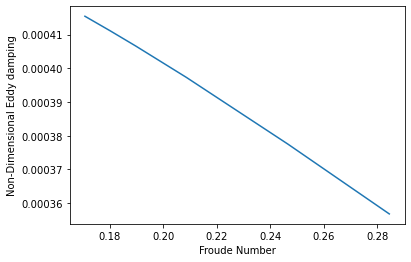

In [202]:
plt.plot(Fnx,B_eny)
plt.ylabel('Non-Dimensional Eddy damping')
plt.xlabel('Froude Number')

## Bilge Keel Damping

In [203]:
r_cb = T*np.sqrt((h_o- 0.293*(R_b/T))**2 + (1-(OG/T)-0.293*(R_b/T))**2)

In [204]:
f= 1 + 0.3*np.exp(-160*(1-a_c))

In [205]:
S_o = 0.3*np.pi*f*r_cb*o + 1.96*b_bk

In [206]:
m1=R_b/T
m2=OG/T
m3=1-m1-m2
m4= h_o-m1
m5=(0.414*h_o + (0.0651*m1**2)-(0.382*h_o + 0.0106)*m1)/((h_o - 0.215*m1)*(1 - 0.215*m1))
m6=(0.414*h_o + (0.0651*m1**2)-(0.382 + 0.0106*h_o)*m1)/((h_o - 0.215*m1)*(1 - 0.215*m1))
m7=(S_o/T) - 0.25*np.pi*m1
m8 = m7 + 0.414*m1

In [207]:
A2 = (m3+m4)*m8 - m7**2
B2 = (m3**2/(3*(h_o-0.215*m1)))+ ((1-m1)**2 * ((2*m3 - m2))/(6*(1 - 0.215*m1))) + (m3*m5 + m4*m6)*m1

In [208]:
0.25*np.pi*R_b

8.847510310672256

In [209]:
S_o

10.789928927924192

In [210]:
C_d = 22.5*(b_bk/(np.pi*r_cb*o*f)) + 2.4 

In [211]:
B_KN=((8/(3*np.pi)) *p * r_cb**3 * b_bk**2 * w * f**2 *C_d)*lbk

In [212]:
B_KN0=((8/(3*np.pi)) *p * r_cb**2 * b_bk * w * o * f**2)*(22.5/(np.pi*f) + 2.4*(r_cb*o/b_bk))

In [213]:
B_KKN=B_KN0+ (np.pi/2 * p * b_bk**2 * r_cb**2 * U)

In [214]:
ik= (-(-22.5* (b_bk/(np.pi*r_cb*f*o)) - 1.2)*A2 + 1.2*B2)

In [215]:
ik

1.4063843538626677

In [216]:
B_KH = (4/(3*np.pi))*p* r_cb**2 * T**2 * w * o * f**2 *ik *lbk

In [217]:
B_KH

477370143.7288865

In [218]:
B_K = (B_KN+B_KH)

In [219]:
B_KN,B_KKN

(639440585.4263327, 8853302.131429663)

In [220]:
B_KH,B_K

(477370143.7288865, 1116810729.155219)

In [221]:
B_N= ((4/(3*np.pi))*p* r_cb**3 * lbk * w * o * f**2 *ik) 
print(B_N)

82923637.16446035


In [222]:
B_KK=(B_K)*1/(p*vol*B**2)*(B/2*g)**0.5

In [223]:
B_KK

0.06192921905653199

## Keel component

In [224]:
#x1=B/T;x2=C_b;x3=C_m;x4=1-OG/T;x5=w*np.sqrt(B/2*g);x6=20;x7=b_bk/B;x8=lbk/L
#f11=(-0.3651*x2 + 0.3907)*(x1-2.83)**2 - 2.21*x2 +2.632
#f22=0.00255*x6**2 + 0.122*x6 + 0.4794
#f33=(-0.8913*x7**2 - 0.0733*x7)*x8**2 +(5.2857*x7**2 - 0.01185*x7 + 0.00189)*x8
#Bk1=(5*x7 + 0.3*x1 - 0.2*x8 + 0.00126*x6**2 - 0.0425*x6 - 1.86)*x4
#Bk2=-15*x7 + 1.2*x2 - 0.1*x1 - 0.0657*x4**2 + 0.0586*x4 + 1.6164
#Bk3 = 2.5*x4 +15.75
#Abk=f1*f2*f3
#NBK=Abk * np.exp(Bk1 + (Bk2* x3**Bk3))*x5

In [225]:
#NBK
#0.0760905618818024
#0.07890591839431893
#0.16481805993814133

## Lift

In [226]:
C_m
k1=0

In [227]:
K_n=2*np.pi*(T/L)+k1*(4.1*(B/L) - 0.045)

In [228]:
B_L = 0.075*p*U*S* T**3 *K_n*(1- (2.8*(OG/T)) + (4.667* (OG/T)**2))

In [229]:
B_L

2489467679.8143134

In [230]:
lo=0.3*T;lr=0.5*T
B_LL=0.5*p*L*U*K_n*lo*lr*(1- 1.4*(OG/lr)+ 0.7*(OG/lo*lr))

In [231]:
B_LL

33733295.46897354

In [257]:
B_LN=B_LL* (1/(p*vol*B**2))* (B/2*g)**0.5

In [258]:
B_LN

0.001870573580697067

In [234]:
Fn(U)

0.18964256666709325

## Wave Component

In [235]:
x1=B/T;x2=C_b;x3=C_m;x4=1-OG/T;x5=0.02*np.sqrt(B/2*g)
A134 = -0.067119*x1**3 + 0.966362*x1**2 - 4.407535*x1 + 5.894703
A133 = 0.237096*x1**3 - 3.535062*x1**2 + 16.368376*x1 - 20.539908
A132 = -0.350563*x1**3 + 5.222348*x1**2 - 23.974852*x1 + 29.007851
A131 = 0.192207*x1**3 - 2.787462*x1**2 + 12.507855*x1 - 14.764856
A124 = 0.0107667*x1**4 + 0.0018704*x1**3 - 1.2494083*x1**2 + 6.9427931*x1 - 10.2018992
A123 = -0.0589333*x1**4 + 0.2639704*x1**3 + 3.1949667*x1**2 - 21.8126569*x1 + 31.4113508
A122 = 0.1140667*x1**4 - 0.8108963*x1**3 - 2.2186833*x1**2 + 25.1269741*x1 - 37.7729778
A121 = -0.0628667*x1**4 + 0.4989259*x1**3 + 0.52735*x1**2 - 10.7918672*x1 + 16.616327
A113 = -0.015422*x1**3 + 0.220371*x1**2 - 1.084987*x1 + 1.834167
A112 = 0.010185*x1**3 - 0.161176*x1**2 + 0.904989*x1 - 1.641389
A111 = -0.002222*x1**3 + 0.040871*x1**2 - 0.286866*x1 + 0.599424
A13 = A131*x2**3 + A132*x2**2 + A133*x2 + A134
A12 = A121*x2**3 + A122*x2**2 + A123*x2 + A124
A11 = A111*x2**2 + A112*x2 + A113
AA123 = -8.56*x1**3 + 79.549*x1**2 - 235.827*x1 + 236.579
AA122 = 24.015*x1**3 - 222.507*x1**2 - 658.027*x1 - 660.665
AA121 = -16.872*x1**3 + 156.399*x1**2 - 460.689*x1 + 463.848
AA113 = 9.077*x1**3 - 84.332*x1**2 + 249.983*x1 - 250.787
AA112 = -25.507*x1**3 + 236.275*x1**2 - 698.683*x1 + 701.494
AA111 = 17.945*x1**3 - 166.294*x1**2 + 489.799*x1 - 493.142
AA12 = AA121*x2**2 + AA122*x2 + AA123
AA11 = AA111*x2**2 + AA112*x2 +AA113

In [236]:
A37= 299122.8727*x2**6 - 1175773.1606*x2**5 + 1907356.1357*x2**4 - 1634256.8172*x2**3 + 780020.9393*x2**2 - 196679.7143*x2 + 20467.0904
A36= 822735.9289*x2**6 + 3238899.7308*x2**5 - 5256636.5472*x2**4 + 4500543.147*x2**3 - 2143487.3598*x2**2 + 538548.1194*x2 - 55751.1528
A35= 709672.0656*x2**6 - 2803850.2395*x2**5 + 4553780.5017*x2**4 - 3888378.9905*x2**3 + 1839829.259*x2**2 - 457313.6939*x2 + 46600.823
A34= -110034.6584*x2**6 + 446051.22*x2**5 - 724186.4643*x2**4 + 599411.9264*x3**3 - 264294.7189*x2**2 + 58039.7328*x2 - 4773.6414
A33= -130677.4903*x2**6 + 507996.2604*x2**5 - 826728.7127*x2**4 + 722677.104*x2**3 - 358360.7392*x2**2 + 95501.4948*x2 - 10682.8619
A32= 61639.9103*x2**6 - 241201.0598*x2**5 + 392579.5937*x2**4 - 340629.4699*x2**3 + 166348.6917*x2**2 - 43358.7938*x2 + 4714.7918
A31= -7686.0287*x2**6 + 30131.5678*x2**5 - 49048.9664*x2**4 + 42480.7709*x2**3 - 20665.147*x2**2 + 5355.2035*x2 -577.8827
AA311= (-17.102*x2**3 + 41.495*x2**2 - 33.234*x2 + 8.8007)*x4 + 36.566*x2**3 - 89.203*x2**2 + 71.8*x2 - 18.108
AA32= -0.0727*x1**2 + 0.7*x1 - 1.2818
AA31=(-0.3767*x1**3 + 3.39*x1**2 - 10.356*x1 + 11.588)*AA311
x6= x4-AA32
AA3= AA31*(-1.05584*x6**9 + 12.688*x6**8 - 63.70534*x6**7 + 172.84571*x6**6 - 274.05701*x6**5 + 257.68705**x6**4 - 141.40915*x6**3 + 44.13177*x6**2 - 7.1654*x6 - 0.0495*x1**2 + 0.4518*x1 - 0.61655)
AA1= (AA11*x3 + AA12)*(1-x4)+1
A3 = A31*x4**6 + A32*x4**5 + A33*x4**4 + A34*x4**3 +A35*x4**2 + A36*x4 + A37 + AA3
A2 = -1.402*x4**3 + 7.189*x4**2 - 10.993*x4 + 9.45
A1 = (A11*x4**2 +A12*x4 + A13)*AA1
B_w=(A1/x5) * np.exp(-A2*(np.log(x5)-A3)**2/1.44)

In [237]:
B_w

-0.0

In [238]:
x5

0.3132091952673165

In [239]:
Be=B_fn(U)+B_en(U)+B_LN+0.006+B_KK

In [240]:
Be

0.07020943237486736

## Placement

In [241]:
hh=np.sqrt(17.5**2 + 5.2**2)

In [242]:
5.2/hh

0.2848342447303453

In [243]:
np.arcsin(0.285)/(np.pi/180)

16.558848586492395

In [244]:
hh/2

9.128115906363153

In [245]:
(hh/2)*np.sin(16.55*(np.pi/180))

2.6001617482758155

## Force per unit Length


In [246]:
KC=np.pi*f*o*R_b/b_bk
Ua=R_b*2*np.pi*1/Tn*o
CD=22.5*(KC**-1) + 2.4

In [247]:
F = 0.5*p*b_bk*(Ua**2)*(CD + (1/4*CD)*(np.pi**3 * 1/KC)**2)

In [248]:
F


16688.416988082543

In [249]:
0.7e-3

0.0007

In [250]:
OG

4.083

In [251]:
Fn

<function __main__.Fn(U)>

In [252]:
Fn(U)

0.18964256666709325

In [253]:
0.0178/(L+0.336*15 +0.000221*15**2 )

5.8343492230031664e-05

In [254]:
v

5.8343492230031664e-05